# Caso 1: Estimación de calidad de vinos

In [1]:
# Importar las librerías

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Lectura del DataFrame
df_wine = pd.read_csv("winequality-red.csv")

In [3]:
# Visualización del DataFrame
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# Información del DataFrame

print(f"INFORMACIÓN GENERAL - \n")
print(df_wine.info(),"\n")
print(f"DATA FALTANTE - \n")
print(df_wine.isnull().sum(),"\n")
print(f"FORMA DEL DATAFRAME - \n")
print(df_wine.shape)

INFORMACIÓN GENERAL - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None 

DATA FALTANTE - 

fixed acidity           0
volatile acidity        0
citric acid             0

In [5]:
# Separación de features y label

X = df_wine.drop("quality", axis=1)
y = df_wine[["quality"]]

In [6]:
# Entrenamiento de normalizadores
from sklearn.preprocessing import StandardScaler

scalers = []
for col in X.columns:
  scaler = StandardScaler()
  X[col] = scaler.fit_transform(X[[col]])
  scalers.append(scaler)

In [7]:
# Visualización de X normalizada
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [8]:
# Separación de data de entrenamiento y de testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# Conversión de datos en tensores

X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)

In [10]:
# Diseño de la arquitectura de la red neuronal

class NeuralNetworkRegressionModel(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(NeuralNetworkRegressionModel, self).__init__()
    self.input_layer = nn.Linear(input_dim, 5)
    self.hidden_layer1 = nn.Linear(5, 4)
    self.output_layer = nn.Linear(4, output_dim)
    self.relu = nn.ReLU()

  def forward(self,x):
      out =  self.relu(self.input_layer(x))
      out =  self.relu(self.hidden_layer1(out))
      out =  self.output_layer(out)
      return out

In [11]:
# Función de entrenamiento

def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test,
                  num_epochs, train_losses, test_losses):

    for epoch in range(num_epochs):

        # Limpiar los gradientes del último backpropagation de loss.backward()
        optimizer.zero_grad()

        # Forward feed: predicción el modelo
        output_train = model(X_train)

        # Cálculo de error
        loss_train = criterion(output_train, y_train)
        # Cálculo del gradiente por backpropagation
        loss_train.backward()

        # Actualización de pesos
        optimizer.step()

        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")


In [12]:
# Instanciación de modelo

n_features = X_train.shape[1]
input_dim  = n_features
output_dim = 1

model = NeuralNetworkRegressionModel(input_dim, output_dim)

print(model)

NeuralNetworkRegressionModel(
  (input_layer): Linear(in_features=11, out_features=5, bias=True)
  (hidden_layer1): Linear(in_features=5, out_features=4, bias=True)
  (output_layer): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)


In [13]:
# Declaración de insumos para entrenamiento

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [14]:
# Ejecutar entrenamiento

train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test,
              num_epochs, train_losses, test_losses)

Epoch 50/1000, Train Loss: 2.8872, Test Loss: 2.7808
Epoch 100/1000, Train Loss: 0.8563, Test Loss: 0.7597
Epoch 150/1000, Train Loss: 0.4970, Test Loss: 0.4380
Epoch 200/1000, Train Loss: 0.4493, Test Loss: 0.3998
Epoch 250/1000, Train Loss: 0.4359, Test Loss: 0.3949
Epoch 300/1000, Train Loss: 0.4276, Test Loss: 0.3964
Epoch 350/1000, Train Loss: 0.4199, Test Loss: 0.4060
Epoch 400/1000, Train Loss: 0.4122, Test Loss: 0.4066
Epoch 450/1000, Train Loss: 0.4082, Test Loss: 0.4045
Epoch 500/1000, Train Loss: 0.4044, Test Loss: 0.4010
Epoch 550/1000, Train Loss: 0.4010, Test Loss: 0.3986
Epoch 600/1000, Train Loss: 0.3984, Test Loss: 0.3989
Epoch 650/1000, Train Loss: 0.3955, Test Loss: 0.3982
Epoch 700/1000, Train Loss: 0.3934, Test Loss: 0.3976
Epoch 750/1000, Train Loss: 0.3919, Test Loss: 0.3988
Epoch 800/1000, Train Loss: 0.3909, Test Loss: 0.4008
Epoch 850/1000, Train Loss: 0.3902, Test Loss: 0.4024
Epoch 900/1000, Train Loss: 0.3893, Test Loss: 0.4043
Epoch 950/1000, Train Loss: 0

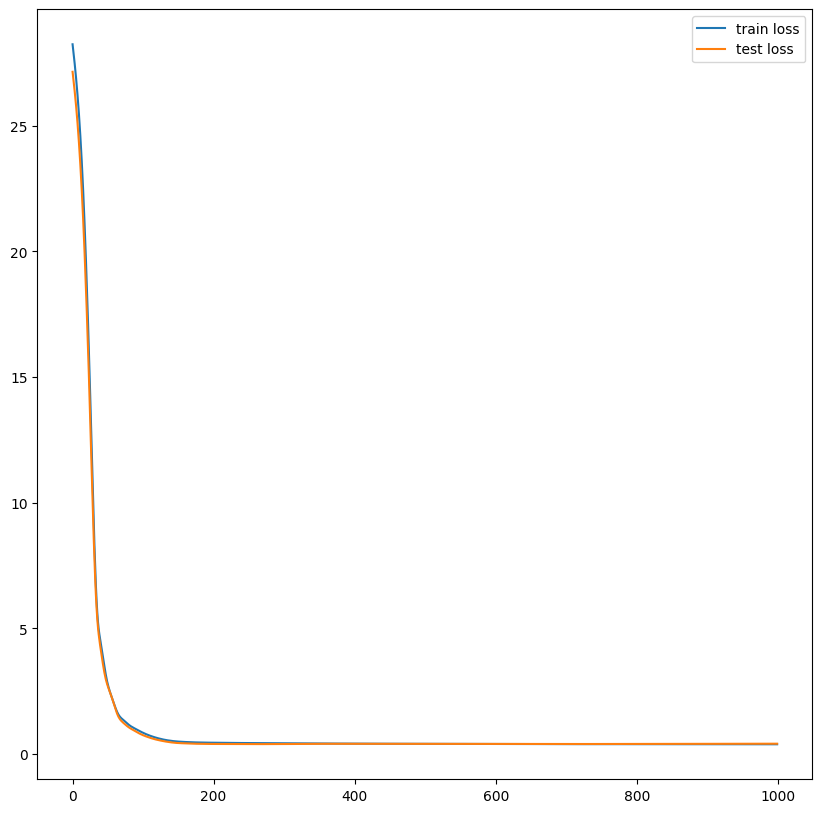

In [15]:
# Gráfica de análisis de error de entrenamiento vs error de testeo durante las iteraciones

plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [16]:
# Obtención de predicciones

with torch.no_grad():
    predictions_test = model(X_test)

# Caso 2: Patrón función cuadrática f(x) ~ x^2

In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

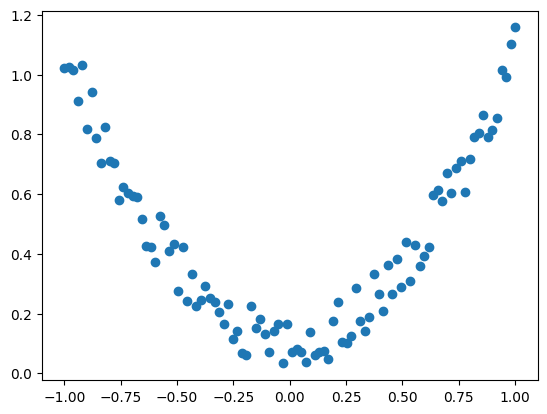

In [18]:
# Creación y visualización del patrón f(x) ~ x^2

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # data 'x' (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # data 'y' con ruido (tensor), shape=(100, 1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [19]:
# Diseño de la arquitectura de la red neuronal

class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [20]:
# Instanciación del modelo

n_features = x.shape[1]
input_dim  = n_features
output_dim = 1

net = Net(n_feature=input_dim, n_hidden=10, n_output=output_dim)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [21]:
# Declaración de insumos para el entrenamiento

num_epochs = 100
learning_rate = 0.2

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_func = torch.nn.MSELoss()

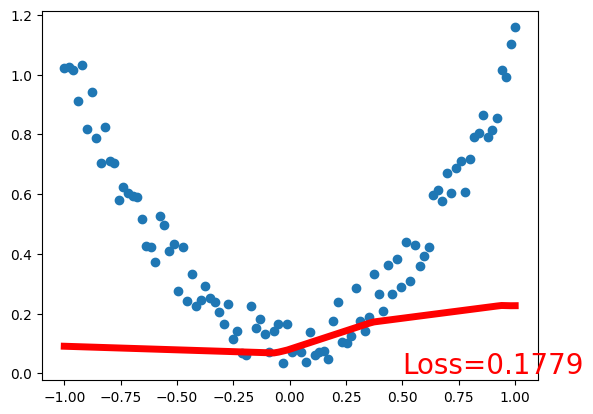

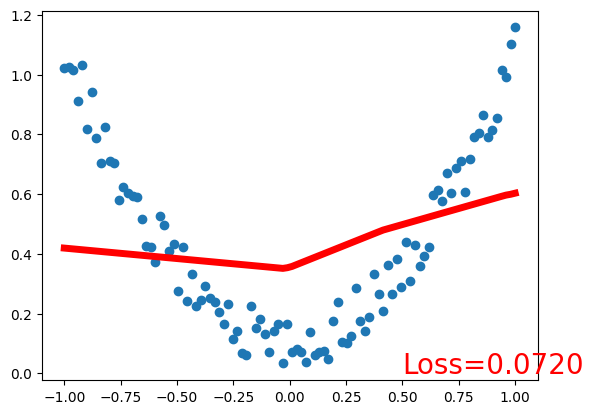

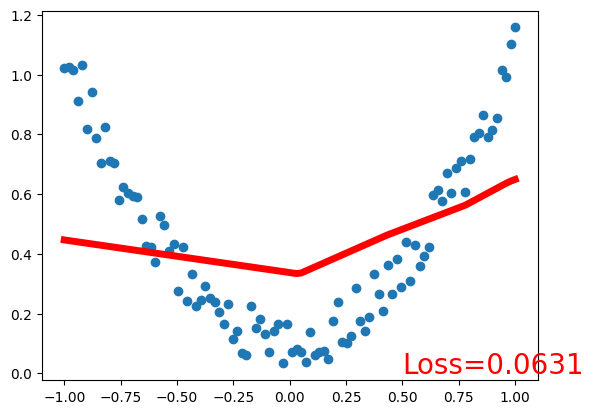

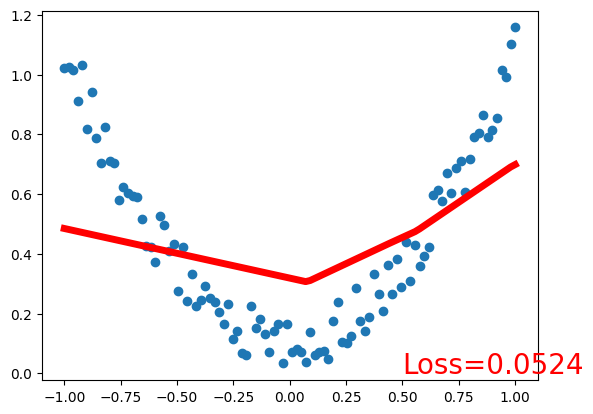

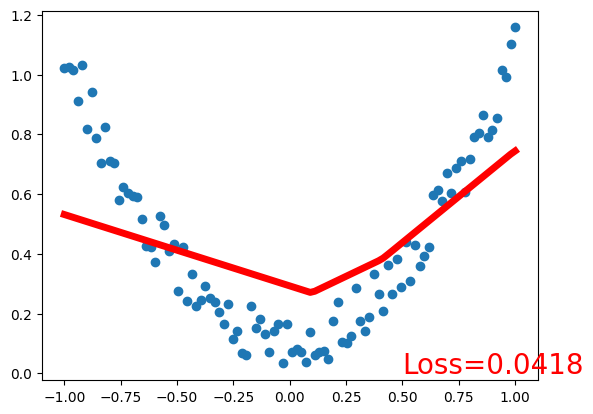

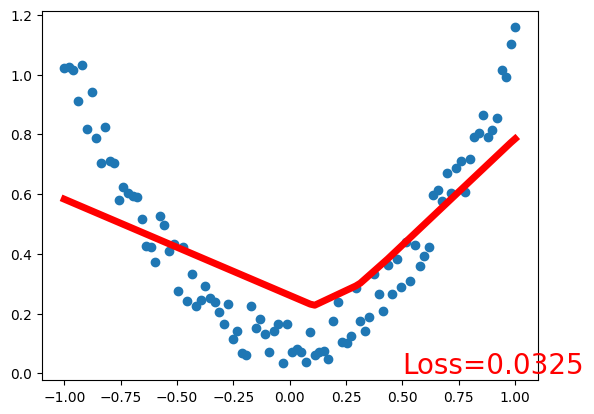

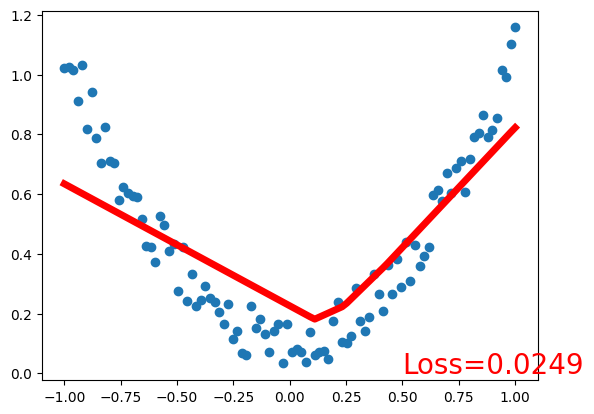

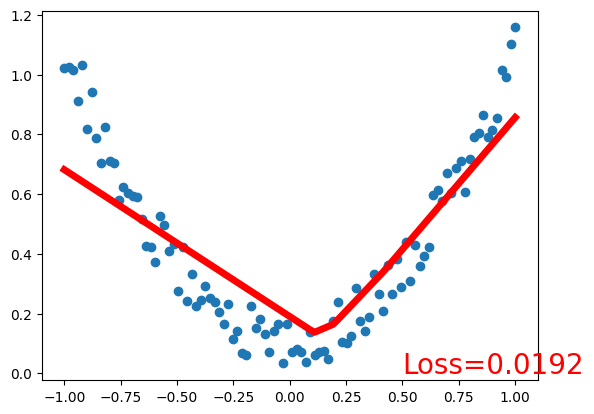

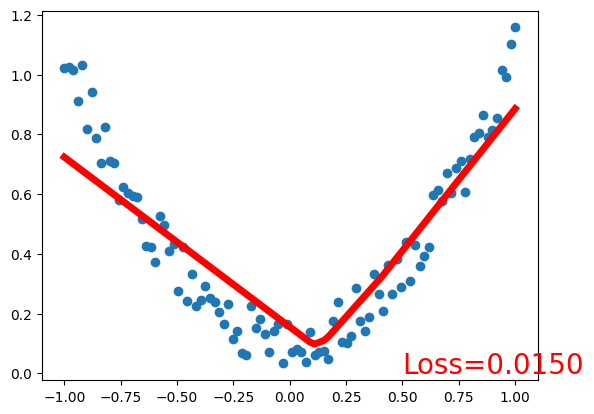

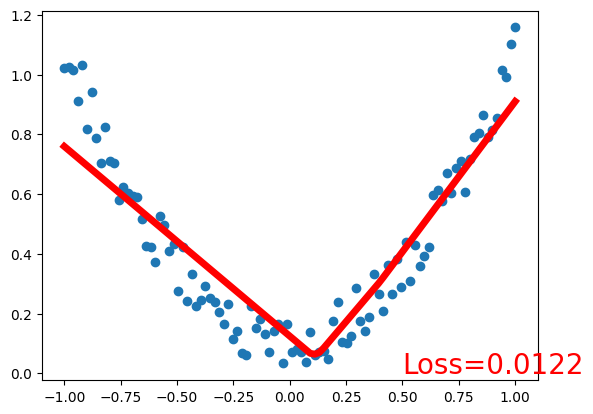

In [22]:
# Ejecución del entrenamiento

for t in range(num_epochs):

    prediction = net(x)     # Entrar x y predicer en base a x

    loss = loss_func(prediction, y)     # Debe ser (1. predicción, 2. etiqueta real)

    optimizer.zero_grad()   # Limpiar los gradientes para la próxima iteración
    loss.backward()         # Backpropagation y computar gradientes
    optimizer.step()        # Aplicar gradientes

    if t % 10 == 0:
        # Graficar proceso de aprendizaje
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

# Reto: Estimación de precios de vehículos

Como reto limpie y preprocese la data de precios de vehículos, diseñe y entrene una red neuronal de regresión para este caso de uso.

In [24]:
df_cars = pd.read_csv("car_price_prediction.csv")

In [25]:
df_cars

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
